# All Data 

Useful links:
- [Indexing, Slicing and Subsetting DataFrames](https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/)

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patheffects as path_effects
from scipy import stats as st

## Prepare Dataframes

In [168]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return float64(x)   
    except:        
        return ''

In [169]:
#Customize loaded data

df = pd.read_csv('FdP_full_20210803_20220307.csv',   
                   sep=',',           #semicolon value file
                   usecols=[1,2,3,4,10,11,13,14,16,17,19,20,22,23,58,59,60,64,69,78,80,84,88,162],   #only load the specified columns
                   parse_dates=[0],     # Intepret the 1st column as a date
                   skiprows=[1],         #skip the 3rd row of the file
                   na_values=['NaN'],      #take any 'NaN' as missing values
                   decimal="."
                   #dtype={"qc_H":int64},"qc_LE":int64},             #parse the salary column as an integer
                   #MORE KEYWORDS
                   #quotechar="'",        #single quote allowed as quote character
                 
                   
)
df.head()

,date,time,DOY,daytime,H,qc_H,LE,qc_LE,co2_flux,qc_co2_flux,...,sonic_temperature,air_temperature,air_pressure,ET,RH,wind_speed,wind_dir,u*,bowen_ratio,mean_value_LI-7500
0,2021-03-08,11:00,215.4582,1.0,208.858,0.0,63.5139,1.0,4.712100,1.0,...,300.872,298.985,96601.7,0.09360,57.5911,1.375210,300.9150,0.201539,3.28838,63.0
1,2021-03-08,11:30,215.4790,1.0,334.030,0.0,60.3729,1.0,2.260540,0.0,...,301.675,304.395,96562.8,0.08950,40.9764,1.082810,279.4070,0.216768,5.53278,63.0
2,2021-03-08,12:00,215.4999,1.0,382.918,0.0,53.5542,0.0,3.593790,0.0,...,303.056,305.593,96527.9,0.07950,38.5745,0.664079,197.5040,0.429349,7.15009,63.0
3,2021-03-08,12:30,215.5207,1.0,309.706,1.0,16.4361,2.0,2.372660,1.0,...,302.756,305.422,96497.6,0.02440,39.0350,1.150010,36.9342,0.524626,18.84300,63.0
4,2021-03-08,13:00,215.5415,1.0,153.511,1.0,71.4098,1.0,0.992559,1.0,...,302.634,304.632,96477.6,0.10587,42.2445,1.235540,76.8809,0.366710,2.14972,63.0


In [170]:
#Rearrange columns to exctract 2 dataframes
cols = list(df.columns.values)

#ENERGY DATA
dfE_eddy = df[cols[0:8]+cols[14:19]+[cols[-2]]]
dfE_eddy.head()

,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,air_pressure,ET,RH,bowen_ratio
0,2021-03-08,11:00,215.4582,1.0,208.858,0.0,63.5139,1.0,300.872,298.985,96601.7,0.09360,57.5911,3.28838
1,2021-03-08,11:30,215.4790,1.0,334.030,0.0,60.3729,1.0,301.675,304.395,96562.8,0.08950,40.9764,5.53278
2,2021-03-08,12:00,215.4999,1.0,382.918,0.0,53.5542,0.0,303.056,305.593,96527.9,0.07950,38.5745,7.15009
3,2021-03-08,12:30,215.5207,1.0,309.706,1.0,16.4361,2.0,302.756,305.422,96497.6,0.02440,39.0350,18.84300
4,2021-03-08,13:00,215.5415,1.0,153.511,1.0,71.4098,1.0,302.634,304.632,96477.6,0.10587,42.2445,2.14972


In [172]:
dfE_cable = pd.read_csv('FdP_full_20210803_20220307.csv',   
                   sep=',',           #semicolon value file
                   usecols=['TIMESTAMP','Ts_rmy_Avg','Rn_meas_Avg','Par_i_Avg','shf_Avg','Tsoil_Avg(1)','Tsoil_Avg(2)','Tsoil_Avg(3)'],   #only load the specified columns
                   #parse_dates=[0],     # Intepret the 1st column as a date
                   skiprows=[1],         #skip the 3rd row of the file
                   na_values=['NaN',''],       #take any 'NaN' as missing values
                   decimal=",",
                   #dtype = {"Rn_meas_Avg": 'float64'}
                   #converters={'Ts_rmy_Avg': convert_dtype,'Rn_meas_Avg': convert_dtype}
                   #low_memory=False
                   #dtype={"qc_H":int},"qc_LE":int},             #parse the salary column as an integer
                   #MORE KEYWORDS
                   #quotechar="'",        #single quote allowed as quote character
)
dfE_cable = dfE_cable.astype({"Rn_meas_Avg": 'float64', "Ts_rmy_Avg": 'float64', "shf_Avg": 'float64'})
dfE_cable

,TIMESTAMP,Ts_rmy_Avg,Rn_meas_Avg,Par_i_Avg,Tsoil_Avg(1),Tsoil_Avg(2),Tsoil_Avg(3),shf_Avg
0,08/03/2021 11:00,27.133270,529.2011,1336.826,30.69789,31.49988,29.57545,219.383700
1,08/03/2021 11:30,27.725940,517.1770,1388.647,32.79612,32.35719,30.75706,255.877800
2,08/03/2021 12:00,28.527910,547.0966,1414.811,34.77409,33.08035,32.04125,281.389500
3,08/03/2021 12:30,29.906030,577.9103,1428.635,36.5105,33.77596,33.34336,302.686300
4,08/03/2021 13:00,29.608880,575.5102,1409.311,37.98877,34.50288,34.64222,321.073900
...,...,...,...,...,...,...,...,...
10357,07/03/2022 08:30,7.527007,NaN,351.6188,8.365124,10.06858,9.361717,-63.098960
10358,07/03/2022 09:00,8.964599,NaN,385.6744,9.944756,12.68547,10.02835,-41.875940
10359,07/03/2022 09:30,9.708576,NaN,186.9154,11.02775,12.31786,10.69035,-13.844390
10360,07/03/2022 10:00,10.218390,NaN,253.42,11.37633,12.57004,11.19287,-3.324230


In [173]:
dfE = pd.concat([dfE_eddy, dfE_cable],axis=1)
dfE.head()

,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,...,RH,bowen_ratio,TIMESTAMP,Ts_rmy_Avg,Rn_meas_Avg,Par_i_Avg,Tsoil_Avg(1),Tsoil_Avg(2),Tsoil_Avg(3),shf_Avg
0,2021-03-08,11:00,215.4582,1.0,208.858,0.0,63.5139,1.0,300.872,298.985,...,57.5911,3.28838,08/03/2021 11:00,27.13327,529.2011,1336.826,30.69789,31.49988,29.57545,219.3837
1,2021-03-08,11:30,215.4790,1.0,334.030,0.0,60.3729,1.0,301.675,304.395,...,40.9764,5.53278,08/03/2021 11:30,27.72594,517.1770,1388.647,32.79612,32.35719,30.75706,255.8778
2,2021-03-08,12:00,215.4999,1.0,382.918,0.0,53.5542,0.0,303.056,305.593,...,38.5745,7.15009,08/03/2021 12:00,28.52791,547.0966,1414.811,34.77409,33.08035,32.04125,281.3895
3,2021-03-08,12:30,215.5207,1.0,309.706,1.0,16.4361,2.0,302.756,305.422,...,39.0350,18.84300,08/03/2021 12:30,29.90603,577.9103,1428.635,36.5105,33.77596,33.34336,302.6863
4,2021-03-08,13:00,215.5415,1.0,153.511,1.0,71.4098,1.0,302.634,304.632,...,42.2445,2.14972,08/03/2021 13:00,29.60888,575.5102,1409.311,37.98877,34.50288,34.64222,321.0739


In [174]:
#FLUX DATA 
dfF = df[cols[0:4]+cols[8:14]+cols[19:22]+[cols[-1]]] #get flux relevant data
dfF.head()

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
0,2021-03-08,11:00,215.4582,1.0,4.712100,1.0,1.445170,1.0,NaN,NaN,1.375210,300.9150,0.201539,63.0
1,2021-03-08,11:30,215.4790,1.0,2.260540,0.0,1.380960,1.0,-0.02800,0.0,1.082810,279.4070,0.216768,63.0
2,2021-03-08,12:00,215.4999,1.0,3.593790,0.0,1.226430,0.0,-0.02780,0.0,0.664079,197.5040,0.429349,63.0
3,2021-03-08,12:30,215.5207,1.0,2.372660,1.0,0.376334,2.0,-0.03700,1.0,1.150010,36.9342,0.524626,63.0
4,2021-03-08,13:00,215.5415,1.0,0.992559,1.0,1.633800,1.0,-0.00948,1.0,1.235540,76.8809,0.366710,63.0


## Plot and Compare Data

### Energy Balance Data

#### Day vs Night
1. separate day/night data -> but don't have to plot separately
2. plot together to see the difference
    - for time use DOY (or hours if short period)
    - find unusually low/high values -> take these days (+ day before & after)
    - plot 3 days together
        - was it sunny or not
        - any cloud throughout the day


In [175]:
print(dfE.shape)

#Daytime
dfE_day = dfE.loc[dfE['daytime']==1]
print(dfE_day.shape)

#Nighttime
dfE_night = dfE[dfE['daytime']==0]
print(dfE_night.shape)
dfE_night.head()

(10362, 22)
(4351, 22)
(4955, 22)


,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,...,RH,bowen_ratio,TIMESTAMP,Ts_rmy_Avg,Rn_meas_Avg,Par_i_Avg,Tsoil_Avg(1),Tsoil_Avg(2),Tsoil_Avg(3),shf_Avg
18,2021-03-08,20:00,215.8332,0.0,17.15970,0.0,1.499050,1.0,299.341,300.054,...,69.1150,11.44700,08/03/2021 20:00,26.86724,-80.83039,0.7362583,32.32934,30.44585,34.74124,-0.490842
19,2021-03-08,20:30,215.8540,0.0,14.60370,0.0,2.738460,2.0,298.747,299.439,...,71.5604,5.33284,08/03/2021 20:30,26.19058,-76.29746,0.2959457,31.42694,29.99661,33.99852,-13.468680
20,2021-03-08,21:00,215.8748,0.0,19.02310,1.0,0.793209,1.0,298.365,299.053,...,72.7279,23.98250,08/03/2021 21:00,25.59725,-75.82121,0.2886642,30.68685,29.61648,33.31488,-21.870120
21,2021-03-08,21:30,215.8956,0.0,-6.03898,1.0,-2.978740,1.0,297.394,298.024,...,76.3371,2.02736,08/03/2021 21:30,25.21456,-74.44509,0.3484687,30.04961,29.24482,32.69364,-28.183160
22,2021-03-08,22:00,215.9165,0.0,8.77291,0.0,0.205187,0.0,297.210,297.840,...,76.7833,42.75570,08/03/2021 22:00,24.24399,-73.31478,0.4400563,29.46637,28.89855,32.1244,-33.640630


#### All measuring period

In [176]:
#Filter out poor quality data
print(dfE.shape)
dfE_H = dfE.loc[(dfE['qc_H']==0)]
dfE_LE = dfE.loc[dfE['qc_LE']==0]
dfE_BR = dfE.loc[(dfE['qc_H']==0) & (dfE['qc_LE']==0)]
dfE_H.shape, dfE_LE.shape, dfE_BR.shape

(10362, 22)


((4617, 22), (3403, 22), (3052, 22))

In [177]:
#Create a new table only with valid data
dfEflux = pd.concat([dfE['date'],dfE['time'],dfE['DOY'],dfE['Rn_meas_Avg'],dfE['shf_Avg'],dfE_H['H'], dfE_LE['LE'],dfE_BR['bowen_ratio'],dfE['ET']],axis=1)
dfEflux.head()

,date,time,DOY,Rn_meas_Avg,shf_Avg,H,LE,bowen_ratio,ET
0,2021-03-08,11:00,215.4582,529.2011,219.3837,208.858,NaN,NaN,0.09360
1,2021-03-08,11:30,215.4790,517.1770,255.8778,334.030,NaN,NaN,0.08950
2,2021-03-08,12:00,215.4999,547.0966,281.3895,382.918,53.5542,7.15009,0.07950
3,2021-03-08,12:30,215.5207,577.9103,302.6863,NaN,NaN,NaN,0.02440
4,2021-03-08,13:00,215.5415,575.5102,321.0739,NaN,NaN,NaN,0.10587


##### Plot all data (qc = 0)

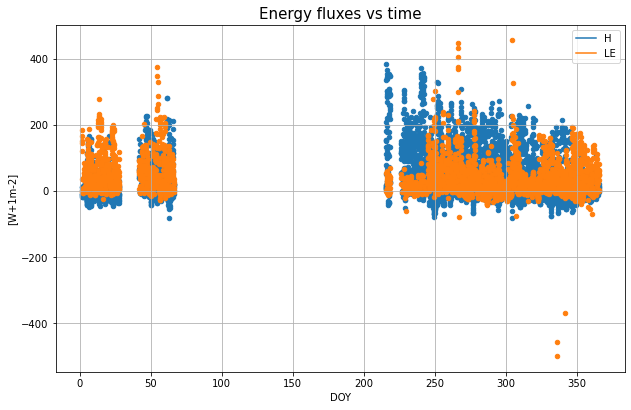

In [178]:
#PLOTTED FROM SEPARATE DATA FRAMES
fig, ax = plt.subplots(1)
plt.title('Energy fluxes vs time',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfE_H.plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),       # just the one needs figsize (last one will determine)
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfE_LE.plot(kind='scatter',x='DOY',y='LE',ax=ax1,
             grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:orange')

#Create a customizable legend
H = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
LE = mlines.Line2D([], [], color='tab:orange', markersize=3, label='LE')
plt.legend(handles=[H, LE]);

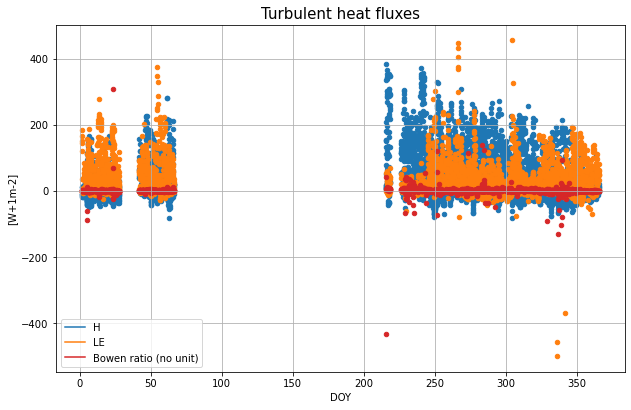

In [179]:
#PLOTTED FROM THE SAME NEW DATA FRAME --> better when taking subset for different variables
fig, ax = plt.subplots(1)
plt.title('Turbulent heat fluxes',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfEflux.plot(kind='scatter',x='DOY',y='LE',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:orange')
dfEflux.plot(kind='scatter',x='DOY',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:red')

#Create a customizable legend
H = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
LE = mlines.Line2D([], [], color='tab:orange', markersize=3, label='LE')
BR = mlines.Line2D([], [], color='tab:red', markersize=3, label='Bowen ratio (no unit)')
plt.legend(handles=[H, LE, BR]);

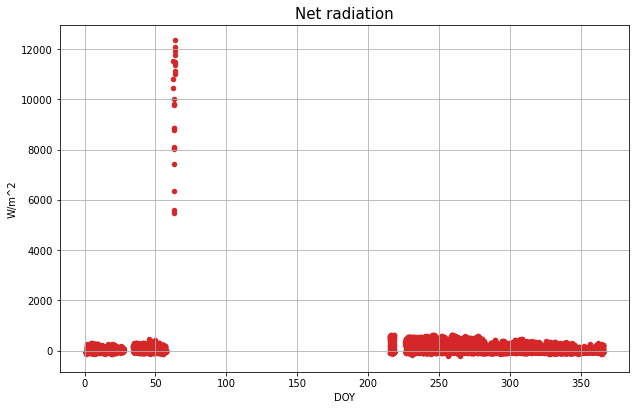

In [184]:
fig, ax = plt.subplots(1)
plt.title('Net radiation',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='DOY',y='Rn_meas_Avg',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='W/m^2',legend=True,color='tab:red');

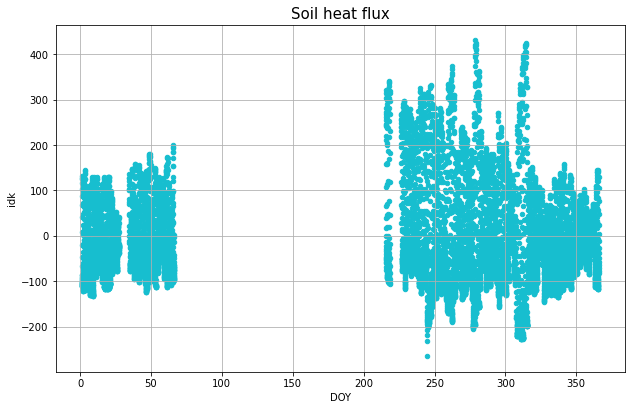

In [185]:
fig, ax = plt.subplots(1)
plt.title('Soil heat flux',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='DOY',y='shf_Avg',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='idk',legend=True,color='tab:cyan');

##### Plot only a part to observe outliers

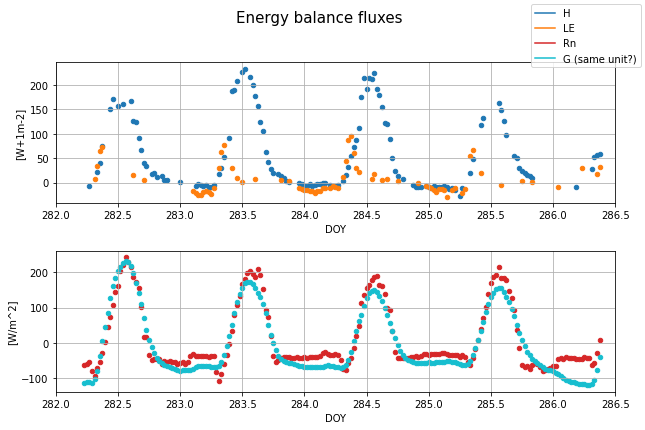

In [186]:
fig, ax = plt.subplots(2)
fig.suptitle('Energy balance fluxes',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
dfEflux[3200:3400].plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,xlim=(282,286.5),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfEflux[3200:3400].plot(kind='scatter',x='DOY',y='LE',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[W+1m-2]',legend=True,color='tab:orange')

ax1 = plt.subplot(212)
dfEflux[3200:3400].plot(kind='scatter',x='DOY',y='Rn_meas_Avg',ax=ax1,
             figsize=(9,6),grid=True,xlim=(282,286.5),
             ylabel='[W/m^2]',legend=True,color='tab:red')
dfEflux[3200:3400].plot(kind='scatter',x='DOY',y='shf_Avg',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[W/m^2]',legend=True,color='tab:cyan')

#Create a customizable legend
H = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
LE = mlines.Line2D([], [], color='tab:orange', markersize=3, label='LE')
RN = mlines.Line2D([], [], color='tab:red', markersize=3, label='Rn')
G = mlines.Line2D([], [], color='tab:cyan', markersize=3, label='G (same unit?)')
fig.legend(handles=[H, LE,RN, G]);

UNDERSTAND:
- https://open.library.okstate.edu/rainorshine/chapter/11-4-surface-energy-balance/
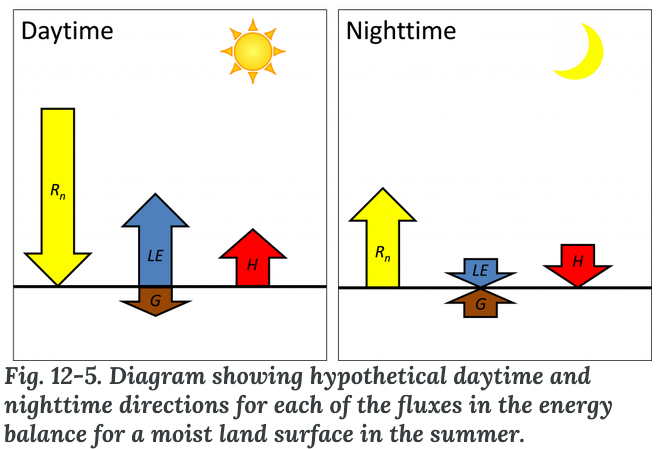
- **latent heat flux (LE)** is the energy that is absorbed by water at the Earth’s surface during evaporation or transpiration apart from any change in temperature
- **sensible heat flux (H)** is the heat transfer between the surface and the atmosphere by conduction and convection
- **soil heat flux (G)** is the heat transfer between the surface and the underlying soil, predominantly by conduction

> **Rn** is defined as positive towards the surface, while all the other terms are defined as positive away from the surface. During the daytime, net radiation is typically towards the surface, and the other fluxes are away from the surface (Fig. 12‑5). In the nighttime, the fluxes are in the opposite directions. The latent heat flux is typically near 0 during the night, although negative values, indicating condensation, are possible

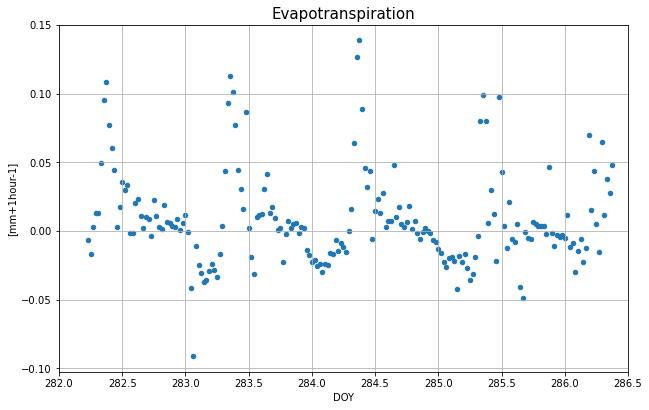

In [187]:
fig, ax = plt.subplots(1)
plt.title('Evapotranspiration',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux[3200:3400].plot(kind='scatter',x='DOY',y='ET',ax=ax1,
             figsize=(9,6),grid=True,xlim=(282,286.5),
             ylabel='[mm+1hour-1]',legend=True,color='tab:blue');

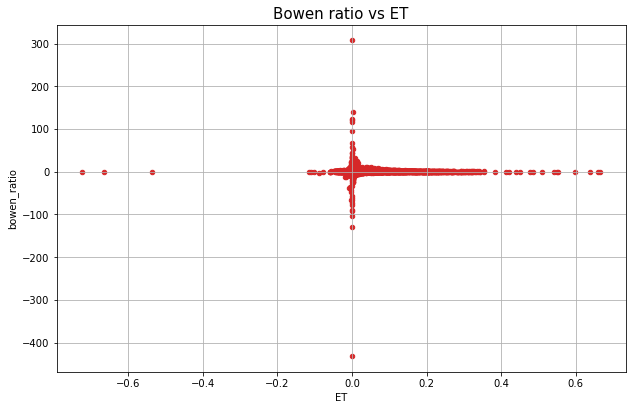

In [188]:
fig, ax = plt.subplots(1)
plt.title('Bowen ratio vs ET',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='ET',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             legend=True,color='tab:red');

In [189]:
#Find indices of boundary values of subset you want to observe
print('LIMITS:',
      '\n lower:', dfEflux[dfEflux['DOY']==220].index,
     '\n upper:', dfEflux[dfEflux['DOY']==250].index)

LIMITS: 
 lower: Int64Index([218], dtype='int64') 
 upper: Int64Index([1654], dtype='int64')


**!! Rather specify axes limits than specifying data subset !!**
- enough to state for one plot
- if subset not specified, y axis can be out of proportion (has to be set too) due to accounting for outliers, which not observed within limits

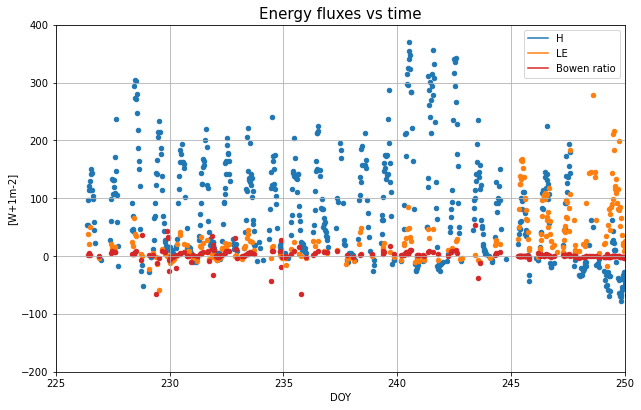

In [190]:
fig, ax = plt.subplots(1)
plt.title('Energy fluxes vs time',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,xlim=(225,250),ylim=(-200,400),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfEflux.plot(kind='scatter',x='DOY',y='LE',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[W+1m-2]',legend=True,color='tab:orange')
dfEflux.plot(kind='scatter',x='DOY',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[W+1m-2]',legend=True,color='tab:red')

#Create a customizable legend
H = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
LE = mlines.Line2D([], [], color='tab:orange', markersize=3, label='LE')
BR = mlines.Line2D([], [], color='tab:red', markersize=3, label='Bowen ratio')
plt.legend(handles=[H, LE, BR]);

#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels = ['jan','feb','march'];
#
#ax.set_xticklabels(labels)

In [191]:
dfEflux['date'].loc[dfEflux['DOY']==245] # 2.9.2021

dfEflux.loc[(dfEflux['DOY']==242)&(dfE['time']=='00:00')]

,date,time,DOY,Rn_meas_Avg,shf_Avg,H,LE,bowen_ratio,ET
1270,2021-08-30,00:00,242.0,-58.5772,-90.74223,-10.8743,NaN,NaN,-0.00767


HOW TO ACCOUNT FOR ANY ARBITRARY VALUES AT DECIMAL PLACES:

In [192]:
dfEflux.loc[dfEflux['DOY'].between(243,244)==True]

,date,time,DOY,Rn_meas_Avg,shf_Avg,H,LE,bowen_ratio,ET
1318,2021-08-31,00:00,243.0000,-53.686240,-92.061200,NaN,NaN,NaN,-0.043600
1319,2021-08-31,00:30,243.0208,-53.519780,-91.910420,NaN,NaN,NaN,-0.172709
1320,2021-08-31,01:00,243.0416,-52.829500,-95.081410,NaN,NaN,NaN,-0.047800
1321,2021-08-31,01:30,243.0624,-53.324910,-97.476230,NaN,NaN,NaN,-0.115385
1322,2021-08-31,02:00,243.0833,-52.396670,-98.288020,NaN,NaN,NaN,-0.041500
1323,2021-08-31,02:30,243.1041,-50.622550,-99.802340,NaN,NaN,NaN,-0.006380
1324,2021-08-31,03:00,243.1249,-50.309320,-100.845800,NaN,NaN,NaN,0.029400
1325,2021-08-31,03:30,243.1458,-52.067270,-101.900700,NaN,NaN,NaN,-0.011500
1326,2021-08-31,04:00,243.1666,-50.534470,-101.132900,NaN,NaN,NaN,-0.005910
1327,2021-08-31,04:30,243.1874,-47.764010,-100.645000,NaN,NaN,NaN,-0.009880


LIMITS: 
 lower: Int64Index([], dtype='int64') 
 upper: Int64Index([458], dtype='int64')


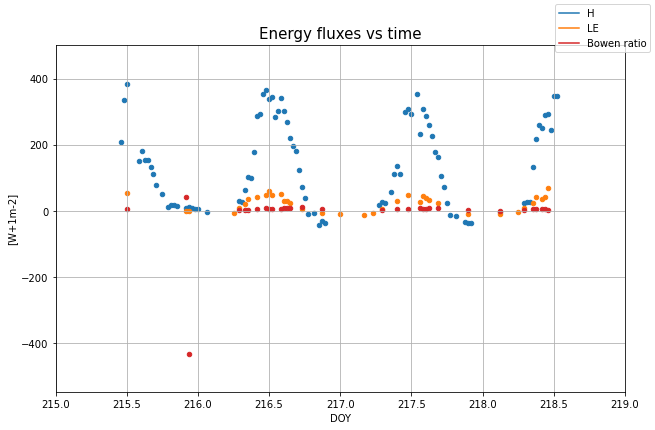

In [194]:
#Find indices of boundary values of subset you want to observe
print('LIMITS:',
      '\n lower:', dfEflux[dfEflux['DOY']==215].index, 
     '\n upper:', dfEflux[dfEflux['DOY']==225].index)

fig, ax = plt.subplots(1)
plt.title('Energy fluxes vs time',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,xlim=(215,219),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfEflux.plot(kind='scatter',x='DOY',y='LE',ax=ax1,
             figsize=(9,6),grid=True,xlim=(215,219),
             ylabel='[W+1m-2]',legend=True,color='tab:orange')
dfEflux.plot(kind='scatter',x='DOY',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,xlim=(215,219),
             ylabel='[W+1m-2]',legend=True,color='tab:red')

#Create a customizable legend
H = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
LE = mlines.Line2D([], [], color='tab:orange', markersize=3, label='LE')
BR = mlines.Line2D([], [], color='tab:red', markersize=3, label='Bowen ratio')
fig.legend(handles=[H, LE, BR]);

LIMITS: 
 lower: Int64Index([6021], dtype='int64') 
 upper: Int64Index([6165], dtype='int64')


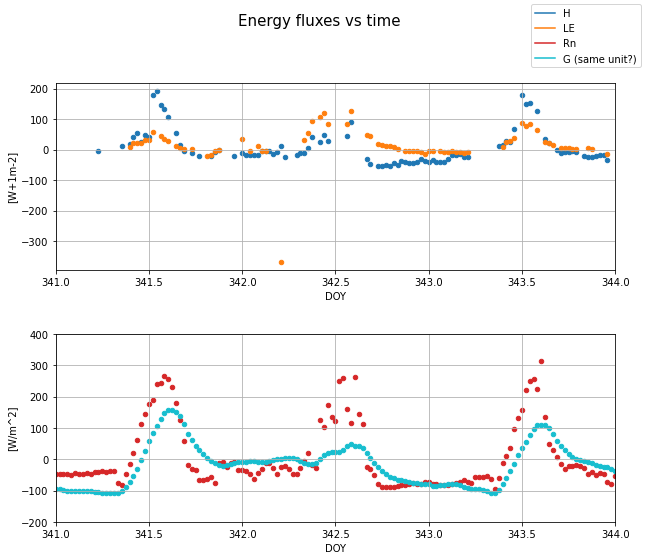

In [195]:
#Find indices of boundary values of subset you want to observe
print('LIMITS:',
      '\n lower:', dfEflux[dfEflux['DOY']==341].index, 
     '\n upper:', dfEflux[dfEflux['DOY']==344].index)

fig, ax = plt.subplots(2)
fig.suptitle('Energy fluxes vs time',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
dfEflux[6021:6165].plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,8),grid=True,xlim=(341,344),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfEflux[6021:6165].plot(kind='scatter',x='DOY',y='LE',ax=ax1,
             grid=True,xlim=(341,344),
             ylabel='[W+1m-2]',legend=True,color='tab:orange')

#if line plot with axes limits insted of subset, extra horizontal lines produced ...
ax1 = plt.subplot(212)
dfEflux.plot(kind='scatter',x='DOY',y='Rn_meas_Avg',ax=ax1,
             grid=True,xlim=(341,344),ylim=(-200,400),
             ylabel='[W/m^2]',legend=False,color='tab:red')
dfEflux.plot(kind='scatter',x='DOY',y='shf_Avg',ax=ax1,
             grid=True,xlim=(341,344),ylim=(-200,400),
             ylabel='[W/m^2]',legend=False,color='tab:cyan')

#Create a customizable legend
H = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
LE = mlines.Line2D([], [], color='tab:orange', markersize=3, label='LE')
RN = mlines.Line2D([], [], color='tab:red', markersize=3, label='Rn')
G = mlines.Line2D([], [], color='tab:cyan', markersize=3, label='G (same unit?)')
fig.legend(handles=[H, LE,RN, G]);

#### Surface-Energy Balance

In [204]:
dfEflux['Rn-G'] = dfEflux['Rn_meas_Avg'] - dfEflux['shf_Avg']
dfEflux['H+LE'] = dfE['H'] + dfE['LE']
dfEflux.head()

,date,time,DOY,Rn_meas_Avg,shf_Avg,H,LE,bowen_ratio,ET,Rn-G,H+LE
0,2021-03-08,11:00,215.4582,529.2011,219.3837,208.858,NaN,NaN,0.09360,309.8174,272.3719
1,2021-03-08,11:30,215.4790,517.1770,255.8778,334.030,NaN,NaN,0.08950,261.2992,394.4029
2,2021-03-08,12:00,215.4999,547.0966,281.3895,382.918,53.5542,7.15009,0.07950,265.7071,436.4722
3,2021-03-08,12:30,215.5207,577.9103,302.6863,NaN,NaN,NaN,0.02440,275.2240,326.1421
4,2021-03-08,13:00,215.5415,575.5102,321.0739,NaN,NaN,NaN,0.10587,254.4363,224.9208


Trying out LR:

In [219]:
#X = dfEflux['Rn-G'].values.reshape(1, -1)  # values converts it into a numpy array
#Y = dfEflux['H+LE'].values.reshape(1, -1)  # -1 means that calculate the dimension of rows, but have 1 column
##X = dfEflux['Rn-G']
##Y = dfEflux['H+LE']
#mask = ~np.isnan(X) & ~np.isnan(Y)
#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X[mask], Y[mask])  # perform linear regression

In [220]:
#dir(linear_regressor)

With updated dataset looks bad, therefore axes limited:

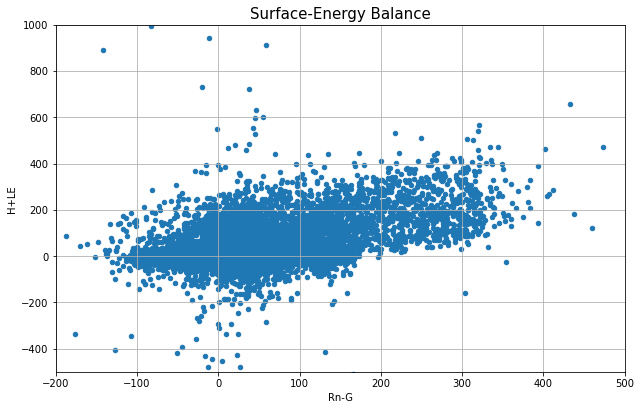

In [201]:
fig, ax = plt.subplots(1)
plt.title('Surface-Energy Balance',size=15)
plt.tight_layout()

ax1 = plt.subplot()
dfEflux.plot(kind='scatter',x='Rn-G',y='H+LE',ax=ax1,
             figsize=(9,6),grid=True, xlim=(-200,500), ylim=(-500,1000),
             legend=True,color='tab:blue');

### Flux Data

Separate gases:

In [223]:
print(dfF.shape)
dfF_co2 = dfF.loc[(dfF['mean_value_LI-7500']==56) & (dfF['qc_co2_flux']==0)]
print(dfF_co2.shape)

print(dfF.shape)
dfF_h2o = dfF.loc[df['qc_h2o_flux']==0]
print(dfF_h2o.shape)

print(dfF.shape)
dfF_ch4 = dfF.loc[dfF['qc_ch4_flux']==0]
print(dfF_ch4.shape) #SMALL SUBSET!!!

dfF_co2.head()

(10362, 14)
(3450, 14)
(10362, 14)
(3403, 14)
(10362, 14)
(1948, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
82,2021-05-08,04:00,217.1666,0.0,-1.801590,0.0,-0.271755,0.0,-0.006700,1.0,0.729896,183.89700,0.068000,56.0
84,2021-05-08,05:00,217.2083,0.0,1.826760,0.0,0.295666,1.0,-0.011000,1.0,1.032910,165.45500,0.091400,56.0
128,2021-06-08,03:00,218.1249,0.0,-0.597578,0.0,-0.185402,0.0,0.011500,1.0,1.049420,167.28100,0.066200,56.0
1106,2021-08-26,14:00,238.5832,1.0,6.138530,0.0,0.903128,1.0,-0.012200,0.0,5.973510,357.47600,0.402249,56.0
1107,2021-08-26,14:30,238.6040,1.0,4.348630,0.0,1.915630,2.0,-0.000891,0.0,5.614540,3.82114,0.462397,56.0


#### CO2 flux

Outliers? 20 and such --> what to do

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
82,2021-05-08,04:00,217.1666,0.0,-1.801590,0.0,-0.271755,0.0,-0.006700,1.0,0.729896,183.89700,0.068000,56.0
84,2021-05-08,05:00,217.2083,0.0,1.826760,0.0,0.295666,1.0,-0.011000,1.0,1.032910,165.45500,0.091400,56.0
128,2021-06-08,03:00,218.1249,0.0,-0.597578,0.0,-0.185402,0.0,0.011500,1.0,1.049420,167.28100,0.066200,56.0
1106,2021-08-26,14:00,238.5832,1.0,6.138530,0.0,0.903128,1.0,-0.012200,0.0,5.973510,357.47600,0.402249,56.0
1107,2021-08-26,14:30,238.6040,1.0,4.348630,0.0,1.915630,2.0,-0.000891,0.0,5.614540,3.82114,0.462397,56.0


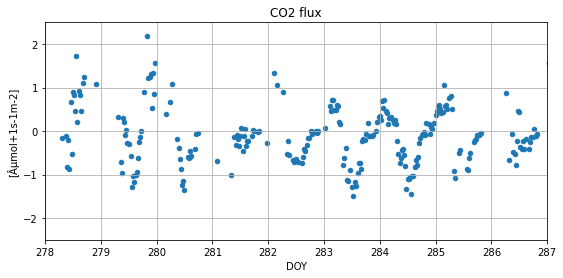

In [224]:
fig, ax = plt.subplots()
# range should be from -10 to +10 -> here not correct
# use scatter 
dfF_co2.plot(kind='scatter',x='DOY',y=['co2_flux'],ax=ax, 
             figsize=(9,4),grid=True, xlim=(278,287), ylim=(-2.5,2.5), #SET AXES LIMITS
             title="CO2 flux",ylabel='[Âµmol+1s-1m-2]');

dfF_co2.head()

##### Canopy vs Lake:

Separate wind directions:

In [225]:
#Wind from the lake
dfF_co2_lake = dfF_co2.loc[(dfF_co2['wind_dir']>=90) & (dfF_co2['wind_dir']<=270)]
print(dfF_co2_lake.shape)

#Wind from the canopy
dfF_co2_canopy = dfF_co2.loc[~((dfF_co2['wind_dir']>=90) & (dfF_co2['wind_dir']<=270))]
print(dfF_co2_canopy.shape)

dfF_co2_lake.head()

(1319, 14)
(2131, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
82,2021-05-08,04:00,217.1666,0.0,-1.801590,0.0,-0.271755,0.0,-0.006700,1.0,0.729896,183.897,0.068000,56.0
84,2021-05-08,05:00,217.2083,0.0,1.826760,0.0,0.295666,1.0,-0.011000,1.0,1.032910,165.455,0.091400,56.0
128,2021-06-08,03:00,218.1249,0.0,-0.597578,0.0,-0.185402,0.0,0.011500,1.0,1.049420,167.281,0.066200,56.0
1125,2021-08-26,23:30,238.9790,0.0,-0.118744,0.0,-0.032300,2.0,0.004400,0.0,1.306250,101.914,0.123076,56.0
1134,2021-08-27,04:00,239.1666,0.0,-0.240987,0.0,0.037300,1.0,0.000531,1.0,0.476685,168.940,0.048300,56.0


Concatenate to get a common DOY axis:

In [226]:
dfF_co2_wind = pd.concat([dfF_co2['DOY'], dfF_co2_canopy['co2_flux'], dfF_co2_lake['co2_flux']],axis=1)
dfF_co2_wind.columns = ['DOY','co2_canopy','co2_lake']
dfF_co2_wind.head()

,DOY,co2_canopy,co2_lake
82,217.1666,NaN,-1.801590
84,217.2083,NaN,1.826760
128,218.1249,NaN,-0.597578
1106,238.5832,6.13853,NaN
1107,238.6040,4.34863,NaN


If rows not specified (e.g. ``[0:37]``), fluxes are averaged for every common time of day ?? --> NO THEY ARE NOT, just random values on axes but shows all data.
Could cluster and represent main average data !

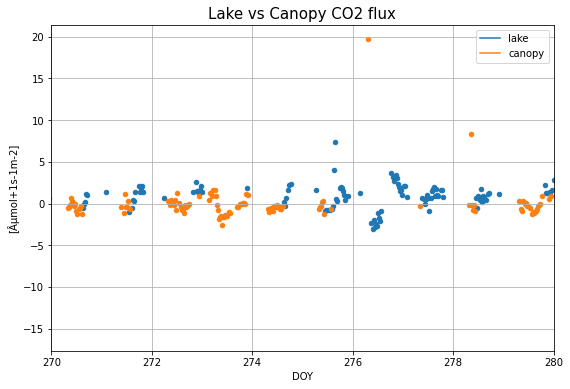

In [227]:
#From 2 different dfs
fig, ax = plt.subplots()
plt.title('Lake vs Canopy CO2 flux',size=15)

ax1 = plt.subplot()
dfF_co2_lake.plot(kind='scatter',x='DOY',y='co2_flux',ax=ax1,
             figsize=(9,6),grid=True,xlim=(270,280),
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')
dfF_co2_canopy.plot(kind='scatter',x='DOY',y='co2_flux',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[Âµmol+1s-1m-2]',color='tab:orange')

#Create a customizable legend
lake = mlines.Line2D([], [], color='tab:blue', markersize=3, label='lake')
canopy = mlines.Line2D([], [], color='tab:orange', markersize=3, label='canopy')
ax1.legend(handles=[lake, canopy]);

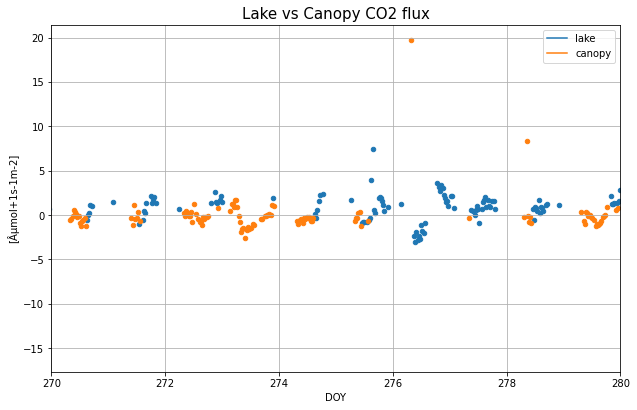

In [228]:
#From the same df
fig, ax = plt.subplots(1)
plt.title('Lake vs Canopy CO2 flux',size=15)
plt.tight_layout()

ax = plt.subplot()
dfF_co2_wind.plot(kind='scatter',x='DOY',y=['co2_lake'],ax=ax, 
             figsize=(9,6),grid=True,xlim=(270,280),#ylim=(-10,10),rot=0,
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')

dfF_co2_wind.plot(kind='scatter',x='DOY',y=['co2_canopy'],ax=ax,
             figsize=(9,6),grid=True,
             ylabel='[Âµmol+1s-1m-2]',color='tab:orange');

lake = mlines.Line2D([], [], color='tab:blue', markersize=3, label='lake')
canopy = mlines.Line2D([], [], color='tab:orange', markersize=3, label='canopy')
plt.legend(handles=[lake, canopy]);

Compute statistics and show as boxplot:

In [229]:
stats_lake = pd.DataFrame(dfF_co2_lake['co2_flux'].describe()).rename(columns={"co2_flux": "lake"})
stats_lake
stats_canopy = pd.DataFrame(dfF_co2_canopy['co2_flux'].describe()).rename(columns={"co2_flux": "canopy"})
statistics = pd.concat([stats_lake, stats_canopy],axis=1)
statistics

,lake,canopy
count,1319.000000,2131.000000
mean,0.571878,0.031340
std,2.883454,1.121182
min,-15.878400,-4.879780
25%,-0.509576,-0.478229
50%,0.787359,-0.088800
75%,1.554210,0.257062
max,15.232100,19.667500


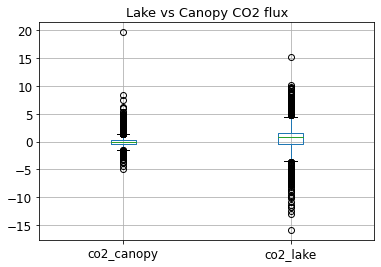

In [230]:
fig, ax = plt.subplots()
plt.title('Lake vs Canopy CO2 flux',size=13)
boxplot = dfF_co2_wind.boxplot(column=['co2_canopy','co2_lake'],ax=ax,fontsize=12, 
                             rot=0, grid=True, figsize=None,layout=None)

##### Day vs Night 

In [231]:
#Daytime
dfF_co2_day = dfF_co2.loc[dfF_co2['daytime']==1]
print(dfF_co2_day.shape)

dfF_co2_night = dfF_co2.loc[dfF_co2['daytime']==0]
print(dfF_co2_night.shape)
dfF_co2_night.head()

(2301, 14)
(1149, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
82,2021-05-08,04:00,217.1666,0.0,-1.801590,0.0,-0.271755,0.0,-0.00670,1.0,0.729896,183.8970,0.068000,56.0
84,2021-05-08,05:00,217.2083,0.0,1.826760,0.0,0.295666,1.0,-0.01100,1.0,1.032910,165.4550,0.091400,56.0
128,2021-06-08,03:00,218.1249,0.0,-0.597578,0.0,-0.185402,0.0,0.01150,1.0,1.049420,167.2810,0.066200,56.0
1122,2021-08-26,22:00,238.9165,0.0,0.120645,0.0,0.011000,0.0,-0.00052,0.0,2.423650,52.7001,0.120527,56.0
1125,2021-08-26,23:30,238.9790,0.0,-0.118744,0.0,-0.032300,2.0,0.00440,0.0,1.306250,101.9140,0.123076,56.0


In [232]:
dfF_co2_time = pd.concat([dfF_co2['date'],dfF_co2['time'],dfF_co2['DOY'],dfF_co2_day['co2_flux'],dfF_co2_night['co2_flux']],axis=1)
dfF_co2_time.columns = ['date','time','DOY','co2_day','co2_night']
dfF_co2_time.head()

,date,time,DOY,co2_day,co2_night
82,2021-05-08,04:00,217.1666,NaN,-1.801590
84,2021-05-08,05:00,217.2083,NaN,1.826760
128,2021-06-08,03:00,218.1249,NaN,-0.597578
1106,2021-08-26,14:00,238.5832,6.13853,NaN
1107,2021-08-26,14:30,238.6040,4.34863,NaN


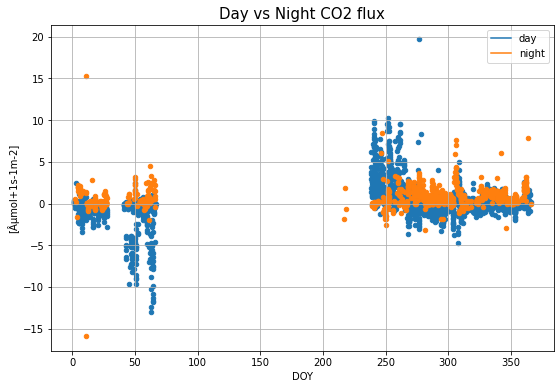

In [234]:
fig, ax = plt.subplots()
plt.title('Day vs Night CO2 flux',size=15)

ax1 = plt.subplot()
dfF_co2_time.plot(kind='scatter',x='DOY',y='co2_day',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(270,275),ylim=(-5,5),
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')
dfF_co2_time.plot(kind='scatter',x='DOY',y='co2_night',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[Âµmol+1s-1m-2]',color='tab:orange')

#Create a customizable legend
day = mlines.Line2D([], [], color='tab:blue', markersize=3, label='day')
night = mlines.Line2D([], [], color='tab:orange', markersize=3, label='night')
ax1.legend(handles=[day, night]);

In [235]:
stats_day = pd.DataFrame(dfF_co2_time['co2_day'].describe())
stats_lake
stats_night = pd.DataFrame(dfF_co2_time['co2_night'].describe())
statistics = pd.concat([stats_day, stats_night],axis=1)
statistics

,co2_day,co2_night
count,2301.000000,1149.000000
mean,0.022899,0.668758
std,2.270206,1.217015
min,-12.993700,-15.878400
25%,-0.708281,0.073400
50%,-0.206622,0.427373
75%,0.532460,1.140820
max,19.667500,15.232100


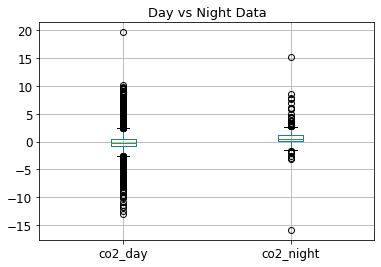

In [236]:
fig, ax = plt.subplots()
plt.title('Day vs Night Data',size=13)
boxplot = dfF_co2_time.boxplot(column=['co2_day','co2_night'],ax=ax,fontsize=12, 
                             rot=0, grid=True, figsize=None,layout=None)

#### CH4 flux

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
1,2021-03-08,11:30,215.4790,1.0,2.26054,0.0,1.380960,1.0,-0.0280,0.0,1.082810,279.4070,0.216768,63.0
2,2021-03-08,12:00,215.4999,1.0,3.59379,0.0,1.226430,0.0,-0.0278,0.0,0.664079,197.5040,0.429349,63.0
6,2021-03-08,14:00,215.5832,1.0,2.46842,0.0,1.110840,1.0,-0.0131,0.0,4.203570,17.6648,0.302743,63.0
7,2021-03-08,14:30,215.6040,1.0,3.28367,0.0,-0.100615,1.0,-0.0168,0.0,4.942300,19.5803,0.334866,63.0
8,2021-03-08,15:00,215.6249,1.0,2.64625,0.0,0.108229,1.0,-0.0115,0.0,4.586510,31.1688,0.261160,63.0


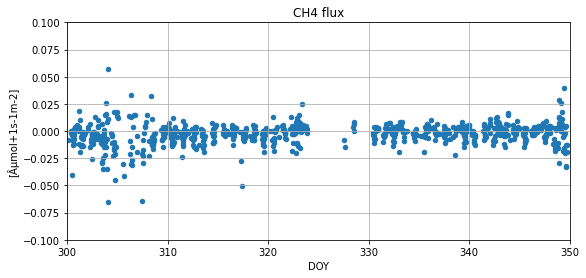

In [237]:
fig, ax = plt.subplots()
dfF_ch4.plot(kind='scatter',x='DOY',y=['ch4_flux'],ax=ax, 
             figsize=(9,4),grid=True, xlim=(300,350), ylim=(-0.1,0.1), #SET AXES LIMITS
             title="CH4 flux",ylabel='[Âµmol+1s-1m-2]');
dfF_ch4.head()

##### Canopy vs Lake:

In [238]:
#Wind from the lake
dfF_ch4_lake = dfF_ch4.loc[(dfF_ch4['wind_dir']>=90) & (dfF_ch4['wind_dir']<=270)]
print(dfF_ch4_lake.shape)
#Wind from the canopy
dfF_ch4_canopy = dfF_ch4.loc[~((dfF_ch4['wind_dir']>=90) & (dfF_ch4['wind_dir']<=270))]
print(dfF_ch4_canopy.shape)

(934, 14)
(1014, 14)


In [239]:
dfF_ch4_lake.head()

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
2,2021-03-08,12:00,215.4999,1.0,3.593790,0.0,1.226430,0.0,-0.02780,0.0,0.664079,197.504,0.429349,63.0
30,2021-04-08,02:00,216.0833,0.0,-0.500808,2.0,0.261025,2.0,-0.00216,0.0,1.020680,166.825,0.076000,61.0
35,2021-04-08,04:30,216.1874,0.0,-1.141280,1.0,-0.001240,2.0,0.00383,0.0,1.056730,170.581,0.082500,59.0
38,2021-04-08,06:00,216.2499,1.0,-0.572507,1.0,-0.155721,0.0,-0.00610,0.0,0.457800,149.399,0.037900,62.0
45,2021-04-08,09:30,216.3957,1.0,3.308890,0.0,-0.652283,2.0,-0.01780,0.0,1.521180,174.708,0.446381,63.0


Concatenate to get a common DOY axis:

In [240]:
dfF_ch4_wind = pd.concat([dfF_ch4['DOY'], dfF_ch4_canopy['ch4_flux'], dfF_ch4_lake['ch4_flux']],axis=1)
dfF_ch4_wind.columns = ['DOY','ch4_canopy','ch4_lake']
dfF_ch4_wind.head()

,DOY,ch4_canopy,ch4_lake
1,215.4790,-0.0280,NaN
2,215.4999,NaN,-0.0278
6,215.5832,-0.0131,NaN
7,215.6040,-0.0168,NaN
8,215.6249,-0.0115,NaN


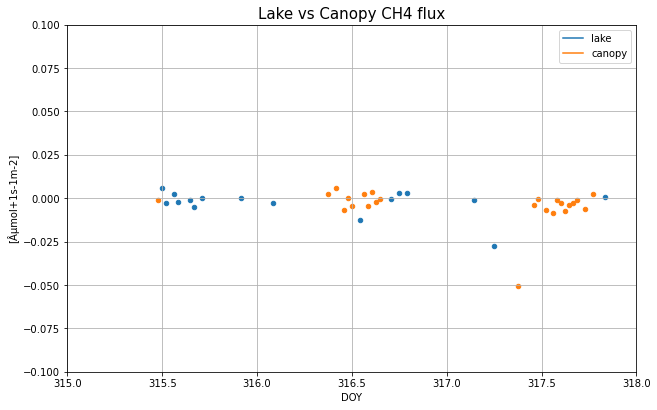

In [241]:
#From the same df
fig, ax = plt.subplots(1)
plt.title('Lake vs Canopy CH4 flux',size=15)
plt.tight_layout()

ax = plt.subplot()
dfF_ch4_wind.plot(kind='scatter',x='DOY',y=['ch4_lake'],ax=ax, 
             figsize=(9,6),grid=True,xlim=(315,318),ylim=(-0.1,0.1),rot=0,
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')

dfF_ch4_wind.plot(kind='scatter',x='DOY',y=['ch4_canopy'],ax=ax,
             figsize=(9,6),grid=True,
             ylabel='[Âµmol+1s-1m-2]',color='tab:orange');

lake = mlines.Line2D([], [], color='tab:blue', markersize=3, label='lake')
canopy = mlines.Line2D([], [], color='tab:orange', markersize=3, label='canopy')
plt.legend(handles=[lake, canopy]);

Compute statistics and show as boxplot:

In [242]:
stats_lake = pd.DataFrame(dfF_ch4_wind['ch4_lake'].describe())
stats_canopy = pd.DataFrame(dfF_ch4_wind['ch4_canopy'].describe())
statistics = pd.concat([stats_lake, stats_canopy],axis=1)
statistics

,ch4_lake,ch4_canopy
count,934.000000,1014.000000
mean,-0.004923,-0.005904
std,0.012144,0.018590
min,-0.063900,-0.137878
25%,-0.010350,-0.012075
50%,-0.002605,-0.004840
75%,0.002012,0.000500
max,0.044200,0.415534


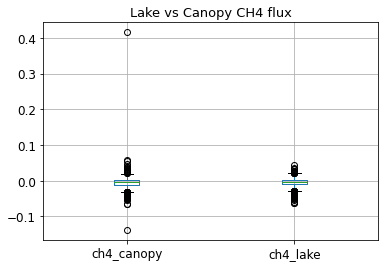

In [243]:
fig, ax = plt.subplots()
plt.title('Lake vs Canopy CH4 flux',size=13)
boxplot = dfF_ch4_wind.boxplot(column=['ch4_canopy','ch4_lake'],ax=ax,fontsize=12, 
                             rot=0, grid=True, figsize=None,layout=None)

##### Day vs Night

In [244]:
#Daytime
dfF_ch4_day = dfF_ch4.loc[dfF_ch4['daytime']==1]
print(dfF_ch4_day.shape)
#Nihttme
dfF_ch4_night = dfF_ch4.loc[dfF_ch4['daytime']==0]
print(dfF_ch4_night.shape)
dfF_ch4_night.head()

(1425, 14)
(523, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
18,2021-03-08,20:00,215.8332,0.0,0.509641,0.0,0.034100,1.0,-0.000277,0.0,5.21061,42.8121,0.266318,63.0
20,2021-03-08,21:00,215.8748,0.0,0.176847,1.0,0.018000,1.0,-0.001890,0.0,4.09658,50.2382,0.172997,63.0
23,2021-03-08,22:30,215.9373,0.0,0.301279,0.0,-0.000553,0.0,0.007200,0.0,3.25191,55.2740,0.167094,63.0
26,2021-04-08,00:00,216.0000,0.0,0.187540,1.0,0.008070,1.0,-0.005710,0.0,2.91981,42.3185,0.137409,63.0
27,2021-04-08,00:30,216.0208,0.0,0.125975,2.0,0.066100,2.0,0.004400,0.0,1.74030,67.6786,0.095500,63.0


In [245]:
dfF_ch4_time = pd.concat([dfF_ch4['date'],dfF_ch4['time'],dfF_ch4['DOY'],dfF_ch4_day['ch4_flux'],dfF_ch4_night['ch4_flux']],axis=1)
dfF_ch4_time.columns = ['date','time','DOY','ch4_day','ch4_night']
dfF_ch4_time.head()

,date,time,DOY,ch4_day,ch4_night
1,2021-03-08,11:30,215.4790,-0.0280,NaN
2,2021-03-08,12:00,215.4999,-0.0278,NaN
6,2021-03-08,14:00,215.5832,-0.0131,NaN
7,2021-03-08,14:30,215.6040,-0.0168,NaN
8,2021-03-08,15:00,215.6249,-0.0115,NaN


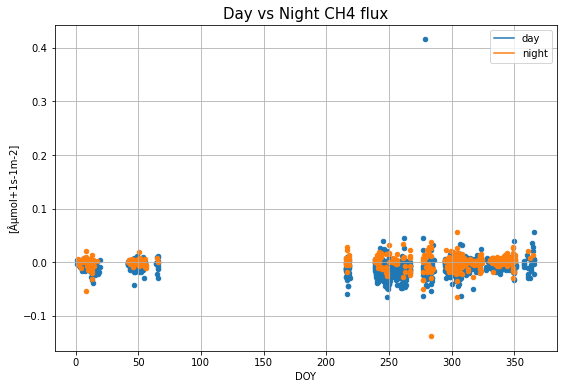

In [246]:
fig, ax = plt.subplots()
plt.title('Day vs Night CH4 flux',size=15)

ax1 = plt.subplot()
dfF_ch4_time.plot(kind='scatter',x='DOY',y='ch4_day',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(270,275),ylim=(-5,5),
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')
dfF_ch4_time.plot(kind='scatter',x='DOY',y='ch4_night',ax=ax1,
             figsize=(9,6),grid=True,
             ylabel='[Âµmol+1s-1m-2]',color='tab:orange')

day = mlines.Line2D([], [], color='tab:blue', markersize=3, label='day')
night = mlines.Line2D([], [], color='tab:orange', markersize=3, label='night')
ax1.legend(handles=[day, night]);

In [247]:
stats_day = pd.DataFrame(dfF_ch4_time['ch4_day'].describe())
stats_night = pd.DataFrame(dfF_ch4_time['ch4_night'].describe())
statistics = pd.concat([stats_day, stats_night],axis=1)
statistics

,ch4_day,ch4_night
count,1425.000000,523.000000
mean,-0.007511,0.000226
std,0.016354,0.012713
min,-0.065400,-0.137878
25%,-0.013100,-0.003235
50%,-0.005690,0.001690
75%,-0.001000,0.005045
max,0.415534,0.057000


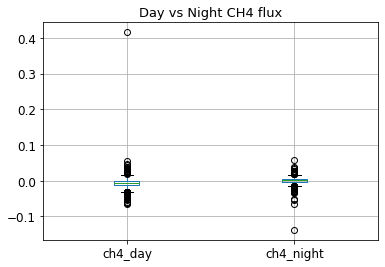

In [248]:
fig, ax = plt.subplots()
plt.title('Day vs Night CH4 flux',size=13)
boxplot = dfF_ch4_time.boxplot(column=['ch4_day','ch4_night'],ax=ax,fontsize=12, 
                             rot=0, grid=True, figsize=None,layout=None)

In [249]:
dir(dfE['DOY'])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__r

##### Subset of data

<AxesSubplot:title={'center':'CH4 flux (3 days)'}, xlabel='DOY', ylabel='[Âµmol+1s-1m-2]'>

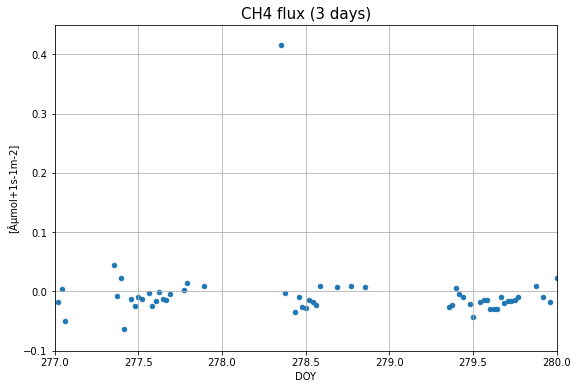

In [250]:
fig, ax = plt.subplots()
plt.title('CH4 flux (3 days)',size=15)

ax1 = plt.subplot()
dfF_ch4.plot(kind='scatter',x='DOY',y='ch4_flux',ax=ax1,
             figsize=(9,6),grid=True,xlim=(277,280),ylim=(-0.1,0.45),
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')

<AxesSubplot:title={'center':'CH4 flux (3 days)'}, xlabel='DOY', ylabel='[Âµmol+1s-1m-2]'>

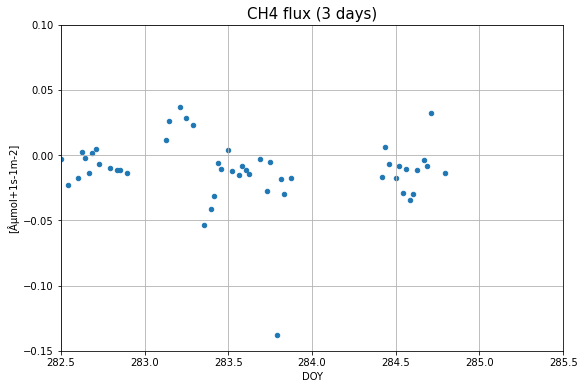

In [252]:
fig, ax = plt.subplots()
plt.title('CH4 flux (3 days)',size=15)

ax1 = plt.subplot()
dfF_ch4.plot(kind='scatter',x='DOY',y='ch4_flux',ax=ax1,
             figsize=(9,6),grid=True,xlim=(282.5,285.5),ylim=(-0.15,0.1),
             ylabel='[Âµmol+1s-1m-2]',color='tab:blue')